In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import model_selection
from sklearn import neighbors, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
def Calcul_Erreur(Y_test,y_pred):
    print("MAE : {:.4f}".format( np.mean(abs(y_pred-Y_test)) ))
    print("R-squared : {:.4f}".format (r2_score(Y_test,y_pred)))
    print("MSE : {:.4f}".format( metrics.mean_squared_error(Y_test, y_pred) ))
    print("RMSE : {:.4f}".format(np.sqrt( metrics.mean_squared_error(Y_test, y_pred) )))
    
def Return_Erreur(Y_test,y_pred):
    MAE =(np.mean(abs(y_pred-Y_test)) )
    R_squared = (r2_score(Y_test,y_pred))
    MSE = (metrics.mean_squared_error(Y_test, y_pred) )
    RMSE = (np.sqrt( metrics.mean_squared_error(Y_test, y_pred) ))
    return (MAE, R_squared, MSE, RMSE)
#,R_squared
def Return_Erreur_graph(Y_test,y_pred):
    MAE =(np.mean(abs(y_pred-Y_test)) )
    R_squared = (r2_score(Y_test,y_pred))
    MSE = (metrics.mean_squared_error(Y_test, y_pred) )
    RMSE = (np.sqrt( metrics.mean_squared_error(Y_test, y_pred) ))
    return (MAE, MSE, RMSE)

### IMPORT DES DONNÉES

In [3]:
df = pd.read_csv('df_clean_nonRes.csv')

In [4]:
df.shape

(1584, 63)

In [6]:
# NA?
df.dropna(axis=0, inplace=True)
df.shape

(1584, 63)

In [7]:
df.head(2)

,Longitude,Neighborhood,BuildingType,TotalGHGEmissions,ComplianceStatus,PropertyGFAParking,CouncilDistrictCode,PropertyGFABuilding(s),OSEBuildingID,SiteEnergyUse(kBtu),...,NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12,CSC 2,CSC 3,CSC 4,CSC 5,CSC 6,CSC 7
0,-122.336816,Downtown,NonResidential,4.248638,1,0.000000,CSC 7,2.111026,325,16.107917,...,1,0,0,0,0,0,0,0,0,1
1,-122.337100,Downtown,NonResidential,3.876189,1,2.342088,CSC 7,2.109053,400,15.691288,...,1,0,0,0,0,0,0,0,0,1


In [8]:
# DONNÉES SANS LES TARGETS
data = df.drop(columns=['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)

In [9]:
# SUPPRESSION DES VARIABLES À L'ORIGINE DES DUMMY VARIABLES
data.drop(columns=['BuildingType',
                   'OSEBuildingID',
                   'ComplianceStatus',
                   'Neighborhood',
                   'PrimaryPropertyType',
                   'CouncilDistrictCode'],
         axis=1,
         inplace=True)

In [10]:
# SUPPRESSION DE RECENTUPGRADES CAR TROP PEU DE DONNÉES
data.drop(columns=['RecentUpgrade'], axis=1, inplace=True)

In [11]:
# SÉPARATION DES FEATURES ET DES TARGETS
X = data.values
y = df['SiteEnergyUse(kBtu)'].values

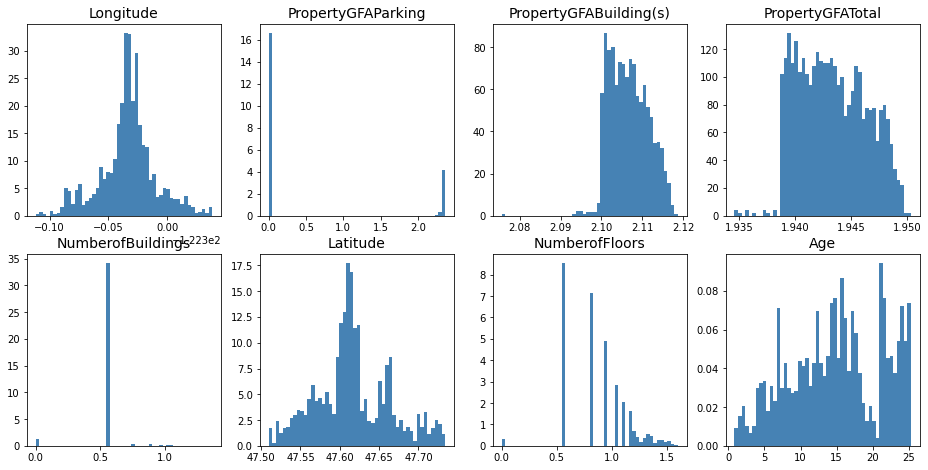

In [13]:
# DISTRIBUTION DES VARIABLES QUANTITATIVES
fig = plt.figure(figsize=(16, 12))

for feat_idx in range(data.loc[:, :'Age'].shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14);

In [14]:
# STANDARTISATION DES FEATURES
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

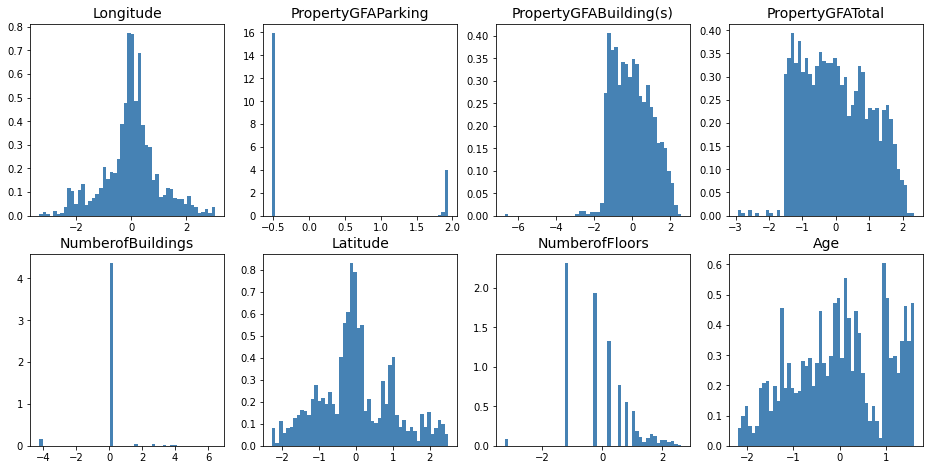

In [15]:
# DISTRIBUTION DES VARIABLES QUANTITATIVES STANDARDISÉES
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(data.loc[:, :'Age'].shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=14)

In [20]:
# CRÉATION D'UN SET DE VALIDATION
X_, X_val, y_, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
Abs = "log Site Energy Use (kBtu) "
Ord = "Prédiction de log Site Energy Use (kBtu)"

## REGRESSION LINÉAIRE SIMPLE

In [46]:
# CROSS VALIDATION 
kf = KFold(n_splits=4)
kf

KFold(n_splits=4, random_state=None, shuffle=False)

In [47]:
# LINEAR REGRESSION DE SKLEARN
lr = linear_model.LinearRegression()

test_set : 
MAE : 0.6108
R-squared : 0.6323
MSE : 0.7205
RMSE : 0.8488

validation_test : 
MAE : 0.5561
R-squared : 0.7053
MSE : 0.5544
RMSE : 0.7446
test_set : 
MAE : 0.5555
R-squared : 0.5859
MSE : 0.6264
RMSE : 0.7915

validation_test : 
MAE : 0.5433
R-squared : 0.7091
MSE : 0.5473
RMSE : 0.7398
test_set : 
MAE : 0.5648
R-squared : 0.5096
MSE : 0.5117
RMSE : 0.7153

validation_test : 
MAE : 0.5463
R-squared : 0.7183
MSE : 0.5299
RMSE : 0.7280
test_set : 
MAE : 0.5860
R-squared : 0.6029
MSE : 0.6076
RMSE : 0.7795

validation_test : 
MAE : 0.5444
R-squared : 0.7190
MSE : 0.5285
RMSE : 0.7270


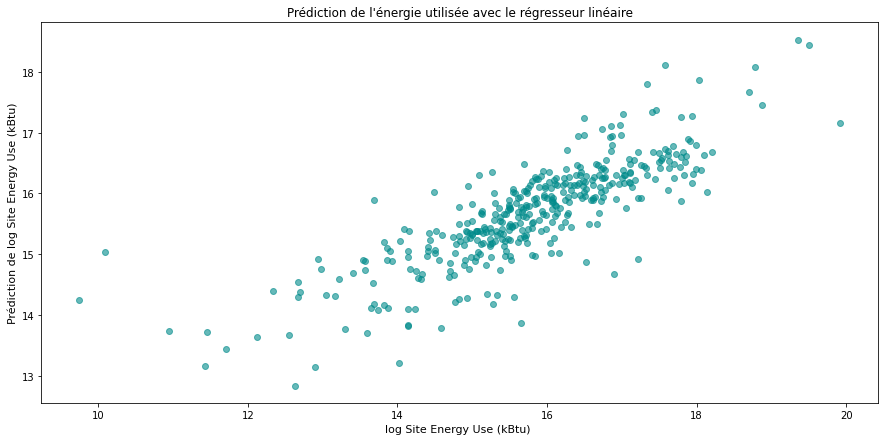

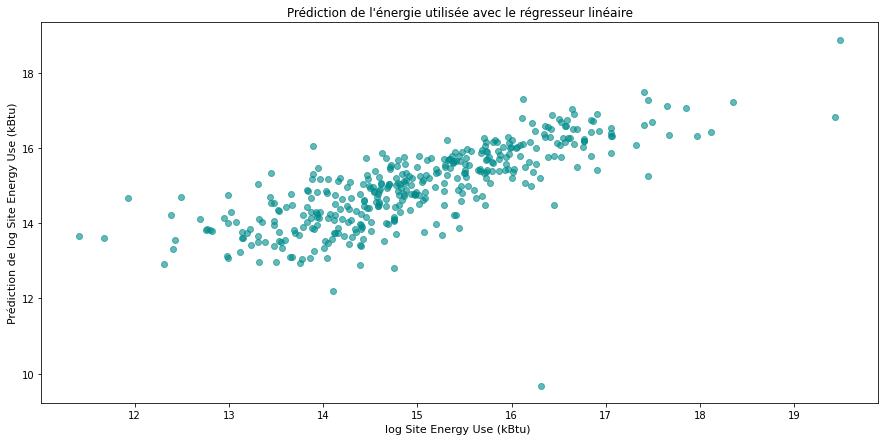

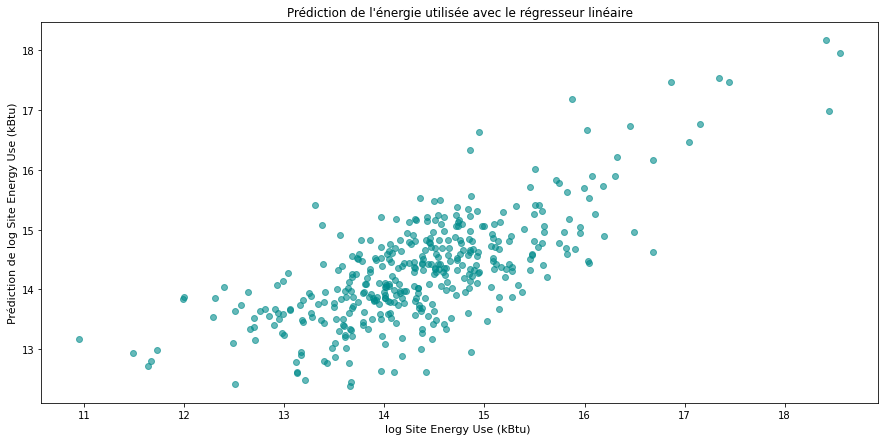

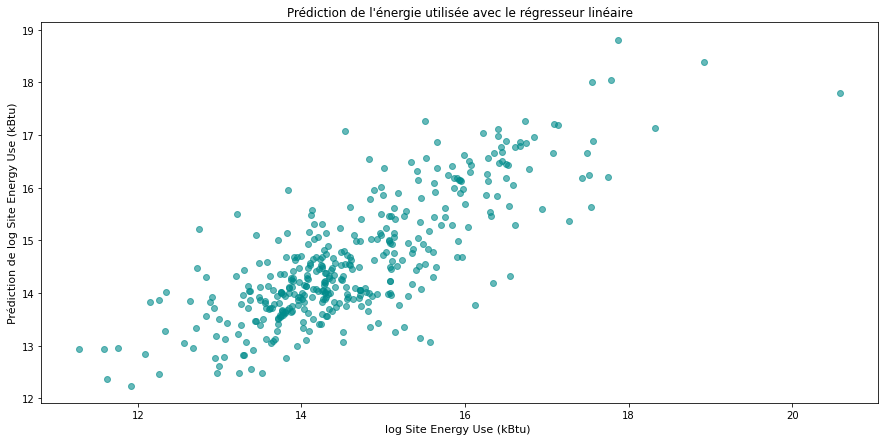

In [48]:
metric = []
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr.fit(X_train, y_train)
    y_pred_rli = lr.predict(X_test)
    
    fig, ax = plt.subplots(figsize=(15,7))
    ax.set_xlabel(Abs, fontsize = 11)
    ax.set_ylabel(Ord, fontsize = 11)
    plt.title("Prédiction de l'énergie utilisée avec le régresseur linéaire", fontsize = 12)
    plt.scatter(y_test, y_pred_rli, color='darkcyan', alpha=0.6)
    
    print('test_set : ')
    Calcul_Erreur(y_test, y_pred_rli)
    metric.append(list(Return_Erreur(y_test, y_pred_rli)))
    
    print('\nvalidation_test : ')
    lr.fit(X_train, y_train)
    y_pred_rli = lr.predict(X_val)
    Calcul_Erreur(y_val, y_pred_rli)
    
    
    print('===================')

In [49]:
metric_lr = pd.DataFrame(metric, columns=['MAE', 'R2', 'MSE', 'RMSE'])
metric_lr.describe().loc['mean']

MAE     0.579283
R2      0.582690
MSE     0.616548
RMSE    0.783773
Name: mean, dtype: float64

In [50]:
metric_lr.describe().loc['std'] * 2

MAE     0.049207
R2      0.104787
MSE     0.171168
RMSE    0.109500
Name: std, dtype: float64

In [52]:
lr.fit(X_, y_)

LinearRegression()

In [53]:
y_pred_rli = lr.predict(X_val)

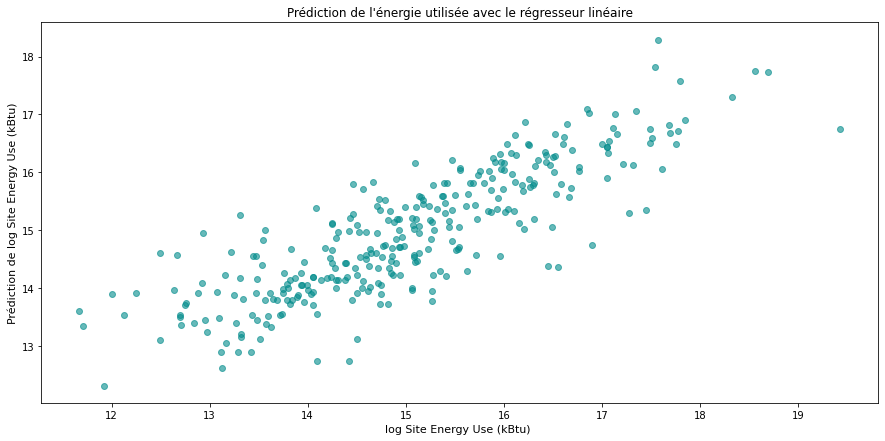

In [56]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 11)
ax.set_ylabel(Ord, fontsize = 11)
plt.title("Prédiction de l'énergie utilisée avec le régresseur linéaire", fontsize = 12)
plt.scatter(y_val, y_pred_rli, color='darkcyan', alpha=0.6);

In [57]:
Calcul_Erreur(y_val, y_pred_rli)

MAE : 0.5583
R-squared : 0.7049
MSE : 0.5552
RMSE : 0.7451


In [68]:
Return_Erreur(y_val, y_pred_rli)[0]

0.5582731794761667

###  REGRESSION RIDGE

In [69]:
# On récupère la MAE sur le jeu de données test comme baseline
baseline_error = Return_Erreur(y_val, y_pred_rli)[0]
print(baseline_error)

0.5582731794761667


In [70]:
ridge2 = linear_model.Ridge()
n_alphas = 300
alphas = np.logspace(-7, 6, n_alphas)
coefs = []
errors = []
for a in alphas:
    ridge2.set_params(alpha=a)
    ridge2.fit(X_, y_)
    coefs.append(ridge2.coef_)
    errors.append([np.mean(abs(ridge2.predict(X_val) - y_val))])

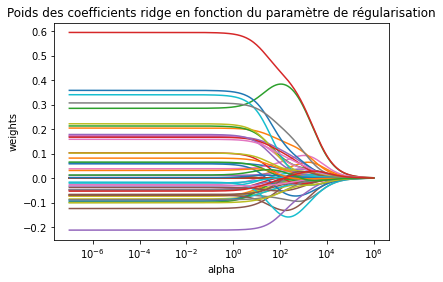

In [71]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Poids des coefficients ridge en fonction du paramètre de régularisation')
plt.axis('tight')
plt.show()

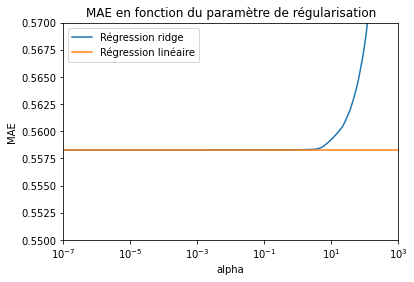

In [86]:
axes = plt.gca()
axes.plot(alphas, errors,[10**-8,10**5],[baseline_error,baseline_error])
axes.set_xscale('log')
plt.axis([0.0000001,1000,0.55,0.57])
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title('MAE en fonction du paramètre de régularisation')
plt.legend(['Régression ridge','Régression linéaire'])
plt.show()

In [79]:
min(errors)

[0.5582731794790959]

In [82]:
alphas[np.argmin(errors)]

1e-07

In [87]:
clf_rr = linear_model.RidgeCV(
    alphas=alphas,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring='neg_mean_absolute_error',   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf_rr.fit(X_, y_)


# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) et alpha sur le jeu d'entraînement:")
print(clf_rr.alpha_, clf_rr.coef_)
y_pred_rr = clf_rr.predict(X_val)

Meilleur(s) hyperparamètre(s) et alpha sur le jeu d'entraînement:
36.74661940736688 [ 0.04738723  0.02223794  0.36747614  0.48485426  0.01806011 -0.07575277
  0.0530841  -0.07689984 -0.05096181 -0.04999019 -0.02137104 -0.02262617
 -0.02713388 -0.00728855 -0.01687374 -0.04126907  0.01749994 -0.0229599
 -0.03556494  0.00368578  0.          0.17418399  0.13399174  0.03912791
  0.13862876 -0.05006627  0.11606209  0.          0.13084298  0.18032866
  0.23205138  0.05417051  0.02465145  0.13187347  0.10145972 -0.1120953
  0.12079629  0.24941281  0.06306006 -0.10717503 -0.0140041   0.
  0.          0.         -0.18449712 -0.03959484 -0.02868795 -0.07404408
 -0.07615114 -0.00236917  0.01131882  0.02909109  0.03427963 -0.01993781]


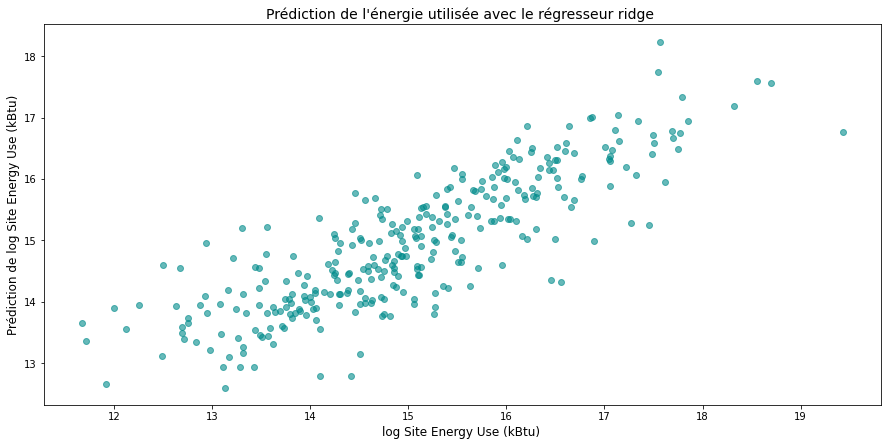

In [89]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec le régresseur ridge ", fontsize = 14)
plt.scatter(y_val, y_pred_rr, color='darkcyan', alpha=0.6);

In [91]:
Calcul_Erreur(y_val,y_pred_rr)

MAE : 0.5620
R-squared : 0.7006
MSE : 0.5631
RMSE : 0.7504


### REGRESSION LASSO

In [92]:
clf_lasso = linear_model.LassoCV(
    alphas=alphas,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    #scoring='neg_mean_absolute_error',
    #store_cv_values = True
    )

# Optimiser ce classifieur sur le jeu d'entraînement
clf_lasso.fit(X_, y_)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) et coefficient sur le jeu d'entraînement:")
print(clf_lasso.alpha_,clf_lasso.coef_)
y_pred_lasso = clf_lasso.predict(X_val)

Meilleur(s) hyperparamètre(s) et coefficient sur le jeu d'entraînement:
0.0018233480008684423 [ 0.03988999  0.          0.27907081  0.59922232  0.01309578 -0.07523095
  0.03850285 -0.07168073 -0.04163813 -0.04418828 -0.0024408  -0.01133912
 -0.          0.00252282 -0.0019222  -0.02621263  0.02719321 -0.01026778
 -0.02634155  0.00132543  0.          0.19107568  0.17876731  0.07226194
  0.15663164 -0.04205666  0.14749305  0.          0.18145263  0.27026864
  0.30116407  0.06820137  0.04599094  0.15187202  0.14257337 -0.08887149
  0.1388708   0.2829889   0.08240794 -0.05603151  0.02453462  0.
  0.          0.         -0.19519752 -0.04916637 -0.02891783 -0.07976095
 -0.08744259 -0.00999196  0.00553686  0.01430062  0.03084333 -0.03625392]


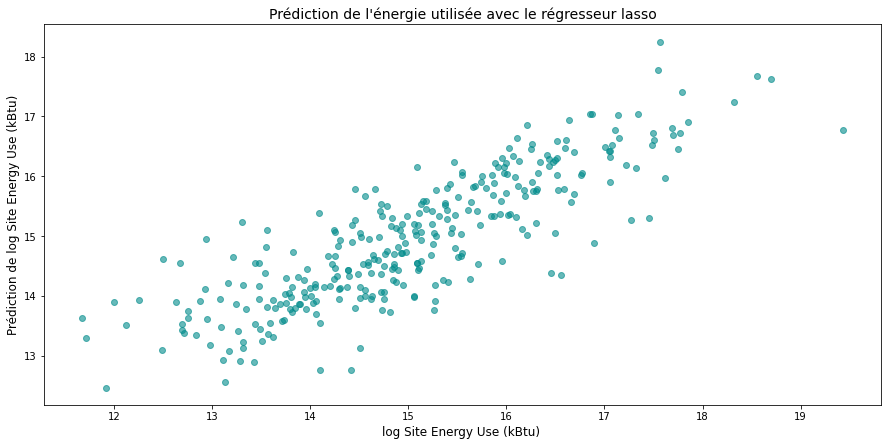

In [93]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec le régresseur lasso", fontsize = 14)
plt.scatter(y_val, y_pred_lasso, color='darkcyan', alpha=0.6)

In [94]:
Calcul_Erreur(y_val,y_pred_lasso)

MAE : 0.5572
R-squared : 0.7050
MSE : 0.5548
RMSE : 0.7449


### REGRESSION ELASTIC NET

In [96]:
clf_el_net = linear_model.ElasticNetCV(
    alphas=alphas,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1]
    #store_cv_values = True
    )

# Optimiser ce classifieur sur le jeu d'entraînement
clf_el_net.fit(X_, y_)
y_pred_el_net = clf_el_net.predict(X_val)
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement alpha et :")
print(clf_el_net.alpha_,clf_el_net.l1_ratio_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement alpha et :
0.04961947603002898 0.1


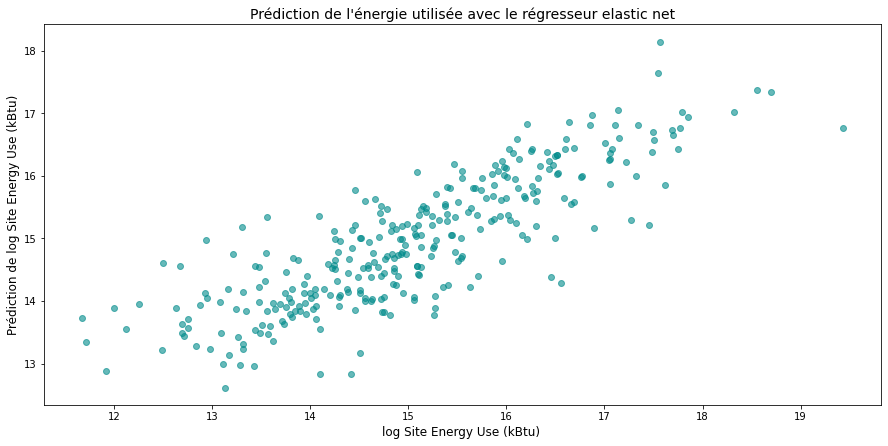

In [97]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec le régresseur elastic net", fontsize = 14)
plt.scatter(y_val, y_pred_el_net, color='darkcyan', alpha=0.6)

In [98]:
Calcul_Erreur(y_val,y_pred_el_net)

MAE : 0.5662
R-squared : 0.6942
MSE : 0.5753
RMSE : 0.7585


### RANDOM FOREST

In [124]:
%%time
md = [i for i in range(4,40,3)]
mf = [j for j in range(7,30,2)]
parameters = {
    'max_depth': md,
    'max_features': mf,
             }

if __name__ == "__main__":

    clf_rfr = model_selection.GridSearchCV(RandomForestRegressor(),
                               parameters,
                               n_jobs=-1,
                               verbose=1,
                              scoring='neg_mean_squared_error')

    print("Performing grid search...")
    print("parameters:")
    pprint(parameters)
    clf_rfr.fit(X_, y_)
    print()

    print("Best score: %0.3f" % -clf_rfr.best_score_)
    print("Best parameters set:")
    best_parameters = clf_rfr.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
parameters:
{'max_depth': [4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37],
 'max_features': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.1min finished



Best score: 0.546
Best parameters set:
	max_depth: 13
	max_features: 15
Wall time: 1min 4s


In [125]:
y_pred_fa = clf_rfr.predict(X_val)

MAE = np.mean(abs(y_pred_fa-y_val))
print("MAE {:.4f}".format(MAE))

MAE 0.5929


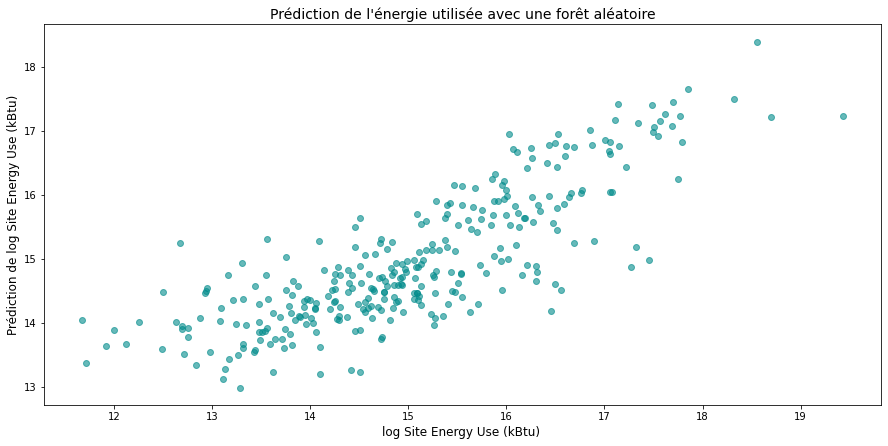

In [126]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec une forêt aléatoire", fontsize = 14)
plt.scatter(y_val, y_pred_fa, color='darkcyan', alpha=0.6);

In [127]:
Calcul_Erreur(y_val, y_pred_fa)

MAE : 0.5929
R-squared : 0.6666
MSE : 0.6271
RMSE : 0.7919


### XGBOOST

In [116]:
%%time
md2 = [i for i in range(2,9)]
mf2 = [j for j in range(7,30,2)]
parameters = {
    'max_depth': md2,
    'max_features': mf2
             }

if __name__ == "__main__":

    clf_xgb = model_selection.GridSearchCV(GradientBoostingRegressor(),
                               parameters,
                               n_jobs=-1,
                               verbose=1,
                              scoring='neg_mean_absolute_error')

    print("Performing grid search...")
    print("parameters:")
    pprint(parameters)
    clf_xgb.fit(X_, y_)
    print()

    print("Best score: %0.3f" % -clf_xgb.best_score_)
    print("Best parameters set:")
    best_parameters = clf_xgb.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
parameters:
{'max_depth': [2, 3, 4, 5, 6, 7, 8],
 'max_features': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}
Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.8s



Best score: 0.529
Best parameters set:
	max_depth: 5
	max_features: 11
Wall time: 15.3 s


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   15.1s finished


In [117]:
y_pred_xgb = clf_xgb.predict(X_val)
MAE_XGB = np.mean(abs(y_pred_xgb-y_val))
print("MAE {:.4f}".format(MAE_XGB))

MAE 0.5692


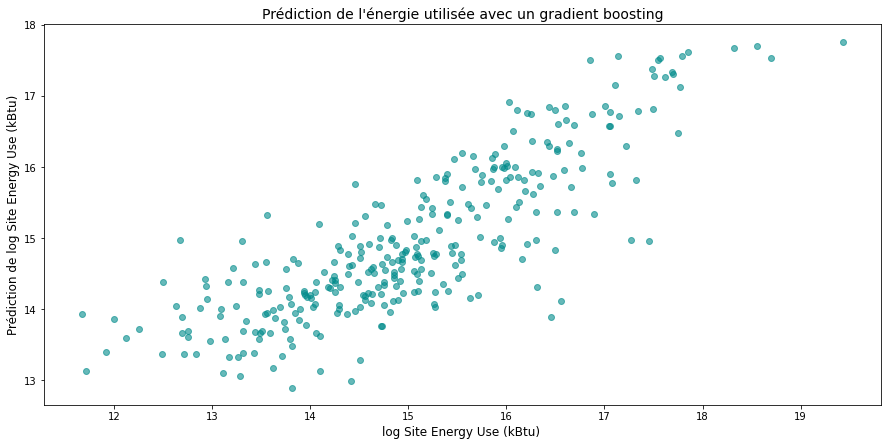

In [118]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel(Abs, fontsize = 12)
ax.set_ylabel(Ord, fontsize = 12)
plt.title("Prédiction de l'énergie utilisée avec un gradient boosting", fontsize = 14)
plt.scatter(y_val, y_pred_xgb, color='darkcyan', alpha=0.6)

In [119]:
Calcul_Erreur(y_val,y_pred_xgb)

MAE : 0.5692
R-squared : 0.6961
MSE : 0.5717
RMSE : 0.7561


### ANALYSE DES RÉSULTATS

In [128]:
met = [metric_lr['R2'].mean()
      ,metric_rr['R2'].mean()
      ,metric_lasso['R2'].mean()
      ,metric_el_net['R2'].mean()
      ,metric_fa['R2'].mean()
      ,metric_xgb['R2'].mean()]

NameError: name 'metric_rr' is not defined

In [129]:
metric_lr['R2'].mean()

0.5826895440299231

In [133]:
Return_Erreur(y_val, y_pred_rli)[0]

0.5582731794761667

In [134]:
Return_Erreur(y_val, y_pred_rr)[0]

0.5619725260571762

In [135]:
Return_Erreur(y_val, y_pred_lasso)[0]

0.557196728856455

In [136]:
Return_Erreur(y_val, y_pred_el_net)[0]

0.566226362318979

In [137]:
Return_Erreur(y_val, y_pred_fa)[0]

0.5929108225893387

In [138]:
Return_Erreur(y_val, y_pred_xgb)[0]

0.5692030193780767

In [139]:
sns.set()

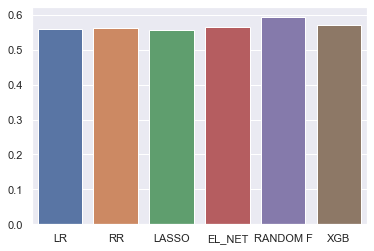

In [141]:
sns.barplot(x=['LR',
               'RR',
               'LASSO',
               'EL_NET',
               'RANDOM F',
               'XGB'],
           y=[Return_Erreur(y_val, y_pred_rli)[0],
             Return_Erreur(y_val, y_pred_rr)[0],
             Return_Erreur(y_val, y_pred_lasso)[0],
             Return_Erreur(y_val, y_pred_el_net)[0],
             Return_Erreur(y_val, y_pred_fa)[0],
             Return_Erreur(y_val, y_pred_xgb)[0]]);